## Basic CNN Implementation: 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd "/content/drive/My Drive/Final "

/content/drive/My Drive/Final 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Input, Dense, Activation, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import lecun_uniform

In [5]:
X_test = np.load("projectdata/X_test.npy")
y_test = np.load("projectdata/y_test.npy")
person_train_valid = np.load("projectdata/person_train_valid.npy")
X_train_valid = np.load("projectdata/X_train_valid.npy")
y_train_valid = np.load("projectdata/y_train_valid.npy")
person_test = np.load("projectdata/person_test.npy")
y_train_valid = to_categorical(y_train_valid - 769)
y_test = to_categorical(y_test - 769)

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115, 4)
Test target shape: (443, 4)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [0]:
def model1(time=450):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(1, 5), activation='relu', input_shape=(22, time, 1)))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, kernel_size=(1, 5), activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(1, 5), activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=[categorical_accuracy])
    return model

In [0]:
def model2(time=1000):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(1, 10), activation='relu', input_shape=(22, time, 1)))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, kernel_size=(1, 10), activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, kernel_size=(1, 10), activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, kernel_size=(21, 1), activation='relu'))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPool2D((1, 4)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=[categorical_accuracy])
    return model

In [0]:
def train(time=1000):
    X_train_valid_cur = X_train_valid[:, :, :time]
    X_train_valid_cur = np.expand_dims(X_train_valid_cur, axis=3)
    y_train_valid_cur = y_train_valid

    X_test_cur = X_test[:, :, :time]
    X_test_cur = np.expand_dims(X_test_cur, axis=3)
    y_test_cur = y_test

    lecun = lecun_uniform(seed=42)
    model = model1(time) if time<450 else model2(time)
    model.fit(X_train_valid_cur, y_train_valid_cur, epochs=40, batch_size=30, validation_data=(X_test_cur, y_test_cur), shuffle=True, verbose=1)
    train_score = model.evaluate(X_train_valid_cur, y_train_valid_cur)
    test_score = model.evaluate(X_test_cur, y_test_cur)

    print("--------")
    print("Train: ", model.metrics_names[1], " ", train_score[1]*100)
    print("--------")
    print("Test: ", model.metrics_names[1], " ", test_score[1]*100)
    print("--------")
    print(model.summary())
    
    return train_score, test_score


In [9]:
# All Subjects:
train_score, test_score = train(1000)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 5s 2ms/sample - loss: 1.8080 - categorical_accuracy: 0.2775 - val_loss: 1.4289 - val_categorical_accuracy: 0.2777
Epoch 2/40
2115/2115 [==============================] - 2s 853us/sample - loss: 1.4885 - categorical_accuracy: 0.3154 - val_loss: 1.3574 - val_categorical_accuracy: 0.3273
Epoch 3/40
2115/2115 [==============================] - 2s 852us/sample - loss: 1.4687 - categorical_accuracy: 0.3262 - val_loss: 1.3375 - val_categorical_accuracy: 0.3747
Epoch 4/40
2115/2115 [==============================] - 2s 842us/sample - loss: 1.3944 - categorical_accuracy: 0.3660 - val_loss: 1.4225 - val_categorical_accuracy: 0.3476
Epoch 5/40
2115/2115 [==============================] - 2s 848us/sample - loss: 1.2855 - categorical_accuracy: 0.4255 - val_loss: 1.2534 - val_categorical_accuracy: 0.4063
Epoch 6/40
211

In [10]:
# Evaluate classification accuracy as a function of time:
scores_train = []
scores_test = []

for i in range(100, 1001, 100):
    print("--------", str(i), "--------")
    train_score, test_score = train(i)
    scores_train.append(train_score[1])
    scores_test.append(test_score[1])

-------- 100 --------
Train on 2115 samples, validate on 443 samples
Epoch 1/40
2115/2115 [==============================] - 1s 510us/sample - loss: 2.3186 - categorical_accuracy: 0.3002 - val_loss: 1.9563 - val_categorical_accuracy: 0.3454
Epoch 2/40
2115/2115 [==============================] - 0s 236us/sample - loss: 1.5591 - categorical_accuracy: 0.3778 - val_loss: 1.5282 - val_categorical_accuracy: 0.3251
Epoch 3/40
2115/2115 [==============================] - 0s 224us/sample - loss: 1.5631 - categorical_accuracy: 0.4085 - val_loss: 1.6066 - val_categorical_accuracy: 0.3679
Epoch 4/40
2115/2115 [==============================] - 0s 229us/sample - loss: 1.3052 - categorical_accuracy: 0.4700 - val_loss: 1.4383 - val_categorical_accuracy: 0.4153
Epoch 5/40
2115/2115 [==============================] - 0s 214us/sample - loss: 1.2483 - categorical_accuracy: 0.4936 - val_loss: 1.3422 - val_categorical_accuracy: 0.4221
Epoch 6/40
2115/2115 [==============================] - 0s 221us/sample

----------------------
Train Accuracies over time:  [0.99432623, 0.9957447, 0.9933806, 0.99669033, 0.9995272, 0.99763596, 0.9971631, 0.9995272, 0.9995272, 0.99810874]
Test Accuracies over time:  [0.3589165, 0.39277652, 0.41309255, 0.4288939, 0.44243792, 0.510158, 0.49887133, 0.523702, 0.49209931, 0.47404063]
Best accuracy:  0.523702
Time period for best accuracy:  800
----------------------


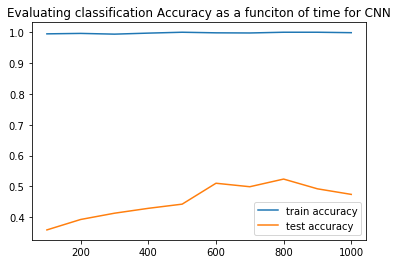

In [13]:
print("----------------------")
print("Train Accuracies over time: ", scores_train)
print("Test Accuracies over time: ", scores_test)
print("Best accuracy: ", max(scores_test))
print("Time period for best accuracy: ", (100 + 100 * np.argmax(scores_test)))
print("----------------------")

plt.plot(range(100, 1001, 100), scores_train, label='train accuracy')
plt.plot(range(100, 1001, 100), scores_test, label='test accuracy')
plt.title("Evaluating classification Accuracy as a funciton of time for CNN")
plt.legend()
plt.show()